# [作業目標]
依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

In [518]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp

dir_data ="desktop/data/"

In [519]:
f_app = os.path.join(dir_data,'application_train.csv')
print('path of read in data:%s'%(f_app))
app_train = pd.read_csv(f_app)
app_train.head()

path of read in data:desktop/data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [520]:
#了解資料數值類型
#方法一
app_train.shape
print(app_train.shape)
#方法二
print('app_train,的行數',app_train.iloc[:,0].shape)
print('app_train,的特徵數',app_train.iloc[0,:].shape)

dtype_app_train = app_train.dtypes.reset_index()
#print(dtype_app_train)
#統計數值類型
dtype_app_train.columns =('count','Columns Type')                                    #(drop=True)=>索引值不見
dtype_app_train = dtype_app_train.groupby('Columns Type').aggregate('count').reset_index()
dtype_app_train




(307511, 122)
app_train,的行數 (307511,)
app_train,的特徵數 (122,)


,Columns Type,count
0,int64,41
1,float64,65
2,object,16


In [521]:
#將各類型數據分類
int_features = []
float_features = []
object_features = []
for dtype,feature in zip(app_train.dtypes,app_train.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)

#print(f'{len(int_features)}Integer Features:{int_features}\n')
#print(f'{len(float_features)}Float Features:{float_features}\n')
#print(f'{len(object_features)}Object Features:{object_features}\n')


In [522]:
#先篩選數值型欄位
dtype_select = app_train.select_dtypes(include=[np.number])
dtype_select.head()



,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [523]:
##把欄位值只有 2數值(0,1)的欄位去掉
for columns in dtype_select:
    if len(np.unique(dtype_select[columns])) == 2:
        del dtype_select[columns]
print(dtype_select.shape[1])   
 
#dtype_select.describe()

73
0         1.0
1         0.0
2         0.0
3         NaN
4         0.0
5         1.0
6         2.0
7         0.0
8         1.0
9         NaN
10        0.0
11        2.0
12        0.0
13        1.0
14        NaN
15        1.0
16        0.0
17        NaN
18        0.0
19        2.0
20        NaN
21        4.0
22        5.0
23        3.0
24        0.0
25        0.0
26        2.0
27        0.0
28        1.0
29        NaN
         ... 
307481    3.0
307482    1.0
307483    5.0
307484    NaN
307485    0.0
307486    1.0
307487    8.0
307488    1.0
307489    2.0
307490    1.0
307491    7.0
307492    0.0
307493    7.0
307494    1.0
307495    1.0
307496    2.0
307497    6.0
307498    2.0
307499    0.0
307500    5.0
307501    NaN
307502    1.0
307503    2.0
307504    NaN
307505    0.0
307506    NaN
307507    NaN
307508    1.0
307509    0.0
307510    1.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, Length: 307511, dtype: float64


In [524]:
#                              轉換成列表           返回1-D數組
for(col , ax) in zip(dtype_select.columns.tolist(),axes.ravel()):
    print(col,ax)

SK_ID_CURR AxesSubplot(0.0197617,0.958586;0.204527x0.0313537)
CNT_CHILDREN AxesSubplot(0.269784,0.958586;0.204527x0.0313537)
AMT_INCOME_TOTAL AxesSubplot(0.519806,0.958586;0.204527x0.0313537)
AMT_CREDIT AxesSubplot(0.769828,0.958586;0.204527x0.0313537)
AMT_ANNUITY AxesSubplot(0.0197617,0.905911;0.204527x0.0313537)
AMT_GOODS_PRICE AxesSubplot(0.269784,0.905911;0.204527x0.0313537)
REGION_POPULATION_RELATIVE AxesSubplot(0.519806,0.905911;0.204527x0.0313537)
DAYS_BIRTH AxesSubplot(0.769828,0.905911;0.204527x0.0313537)
DAYS_EMPLOYED AxesSubplot(0.0197617,0.853236;0.204527x0.0313537)
DAYS_REGISTRATION AxesSubplot(0.269784,0.853236;0.204527x0.0313537)
DAYS_ID_PUBLISH AxesSubplot(0.519806,0.853236;0.204527x0.0313537)
OWN_CAR_AGE AxesSubplot(0.769828,0.853236;0.204527x0.0313537)
CNT_FAM_MEMBERS AxesSubplot(0.0197617,0.800561;0.204527x0.0313537)
REGION_RATING_CLIENT AxesSubplot(0.269784,0.800561;0.204527x0.0313537)
REGION_RATING_CLIENT_W_CITY AxesSubplot(0.519806,0.800561;0.204527x0.0313537)
HOU

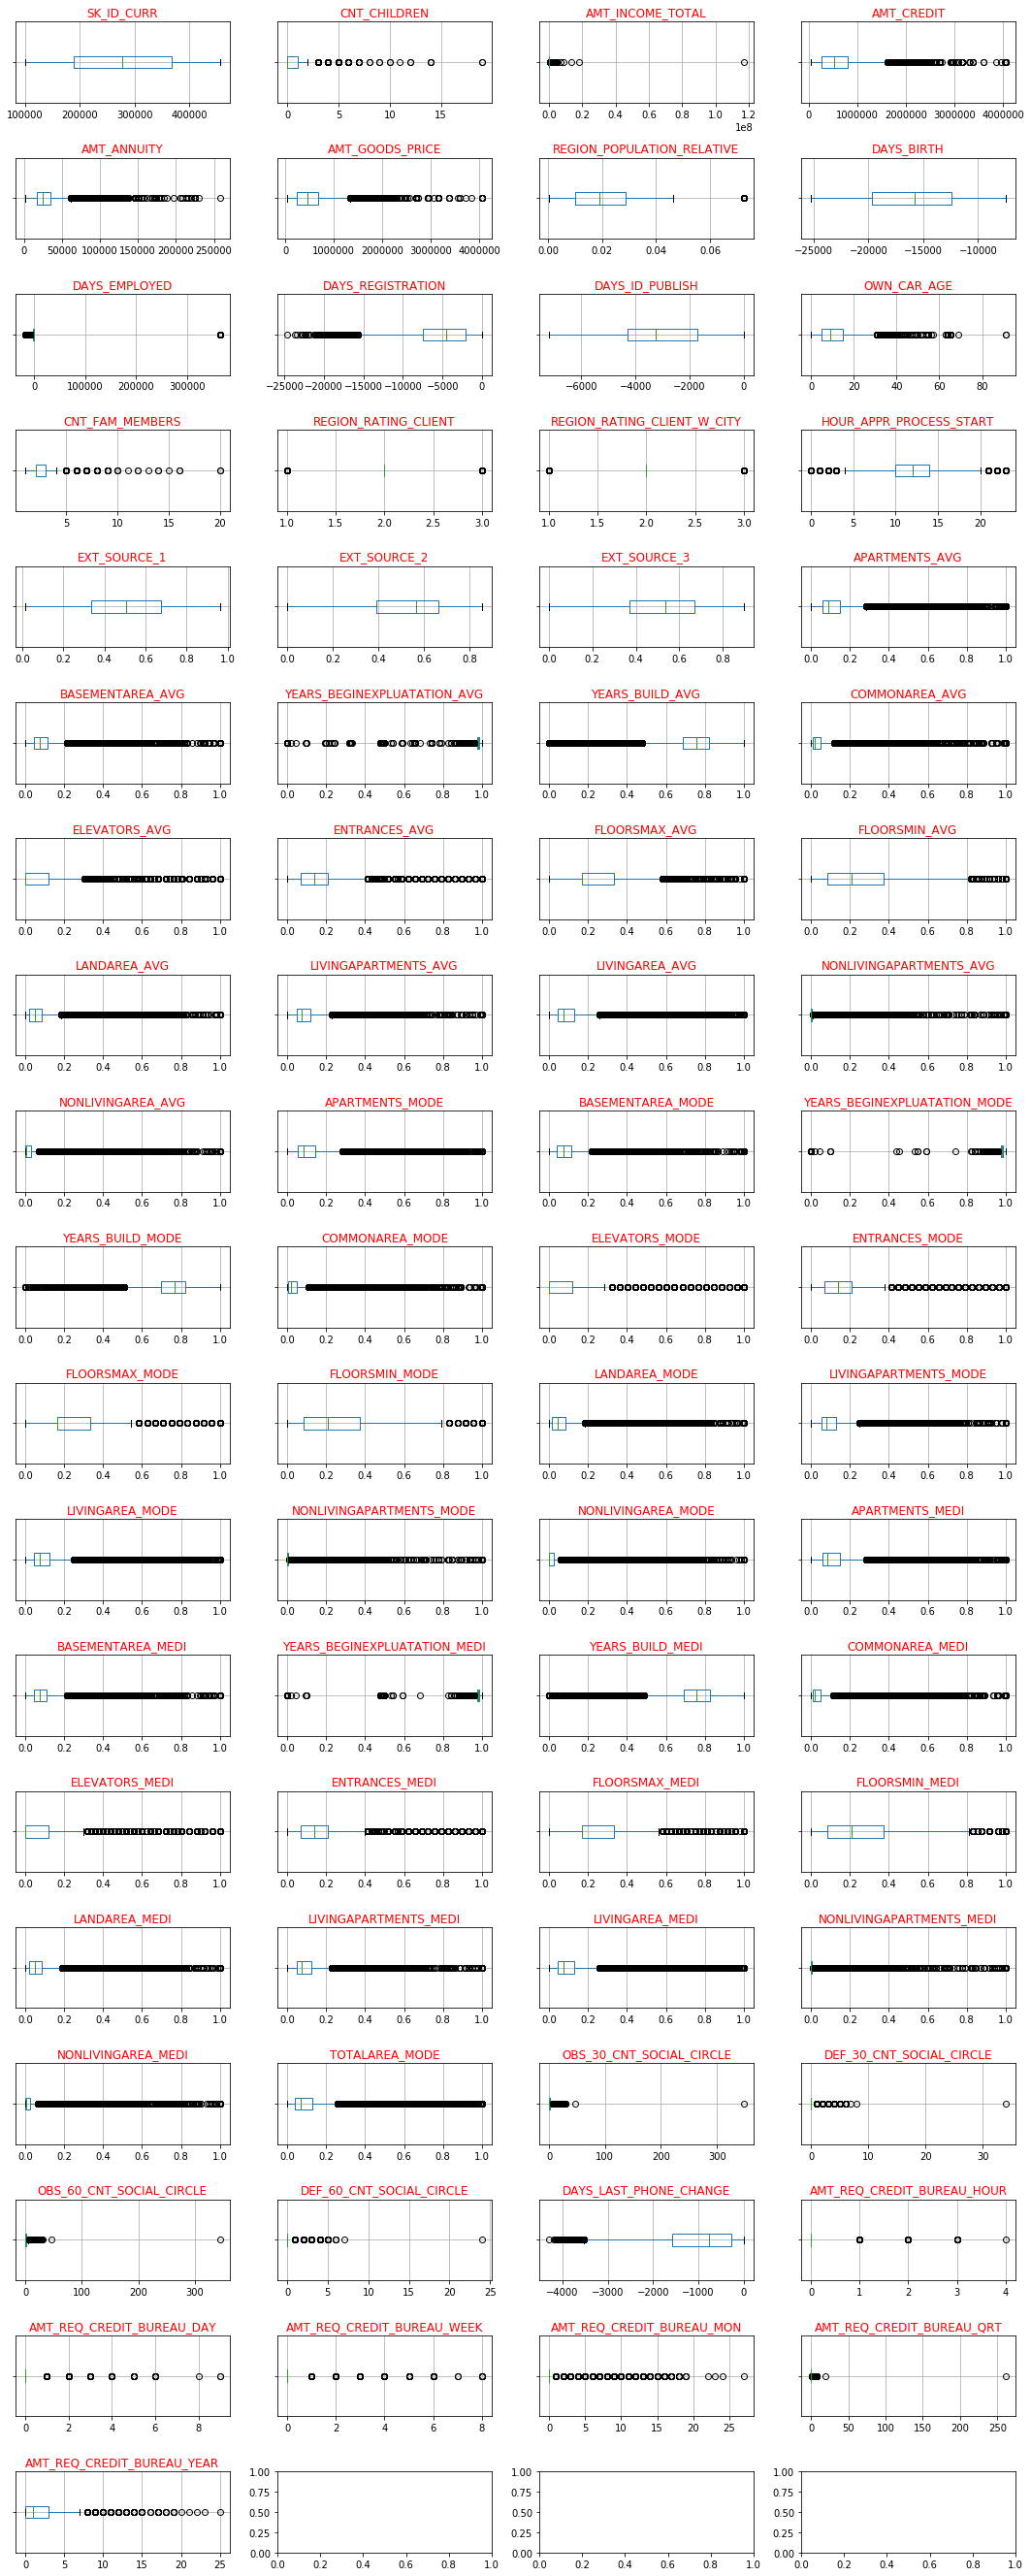

In [496]:
#確認行數後取整數
n_rows = int(np.ceil(dtype_select.shape[1]/2))
#開始畫圖設置                   呈現行數       呈現列數        框框尺寸
fig ,axes = mp.subplots(int(np.ceil(n_rows/2)),4,figsize=(15,n_row*1))
#畫圖
for(col , ax) in zip(dtype_select.columns.tolist(),axes.ravel()):
    dtype_select.boxplot(column=col, ax=ax, vert=False)
    #去除Ｙ軸字體
    ax.set_yticklabels([])
    ax.set_title(col,color='r')
mp.tight_layout()
mp.show()

In [497]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_30_CNT_SOCIAL_CIRCLE
# REGION_RATING_CLIENT

1021
AMT_INCOME_TOTAL


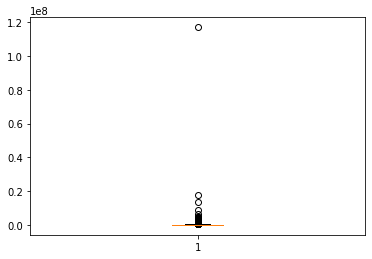

REGION_POPULATION_RELATIVE


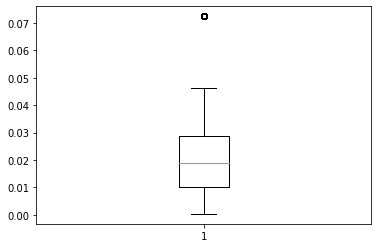

OBS_30_CNT_SOCIAL_CIRCLE


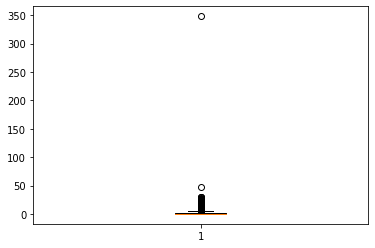

In [498]:
# 最大值離平均與中位數很遠
#print(app_train['AMT_INCOME_TOTAL'].describe())
print(dtype_select['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum())
for c in ['AMT_INCOME_TOTAL','REGION_POPULATION_RELATIVE','OBS_30_CNT_SOCIAL_CIRCLE']:
    print(c)
    mp.boxplot(dtype_select.loc[dtype_select[c].notnull(),c])#告知選遺漏值之外資料進行畫圖,不然畫不出來·
    mp.show()

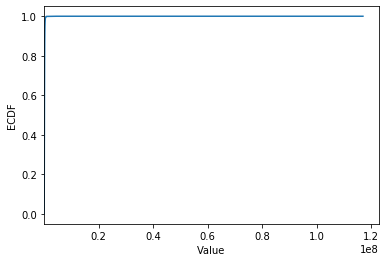

In [499]:
# 繪製 Empirical Cumulative Density Plot 目標值累積密度函數(ECDF)

cdf = app_train.AMT_INCOME_TOTAL.value_counts().sort_index().cumsum()


mp.plot(list(cdf.index), cdf/cdf.max())
mp.xlabel('Value')
mp.ylabel('ECDF')
mp.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
mp.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

mp.show()

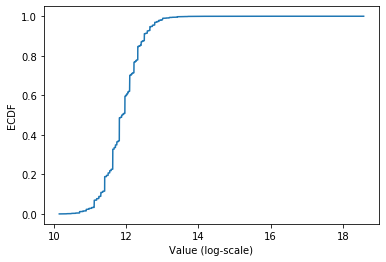

In [500]:
# 利用log改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF 
mp.plot(np.log(list(cdf.index)), cdf/cdf.max())
mp.xlabel('Value (log-scale)')
mp.ylabel('ECDF')

mp.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

mp.show()

In [501]:
#最大值落在分佈之外

print(app_train['REGION_POPULATION_RELATIVE'].describe())


count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


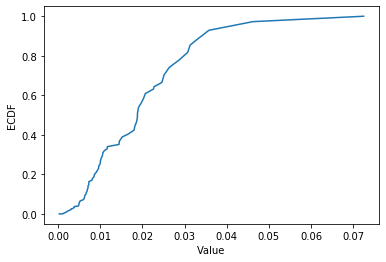

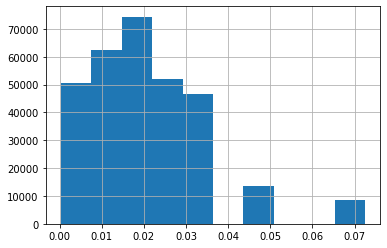

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0.003541      627
0.001276  

In [502]:
# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = app_train.REGION_POPULATION_RELATIVE.value_counts().sort_index().cumsum()


mp.plot(list(cdf.index), cdf/cdf.max())
mp.xlabel('Value')
mp.ylabel('ECDF')
mp.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
mp.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
mp.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


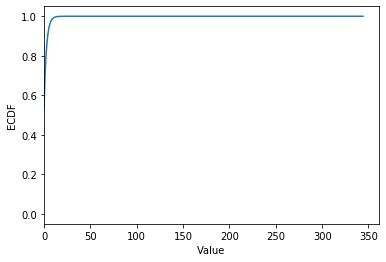

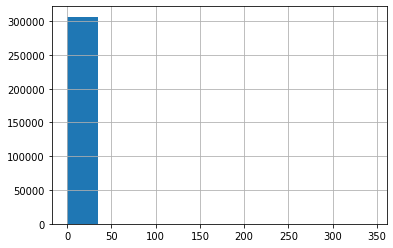

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [503]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)


cdf = app_train.OBS_60_CNT_SOCIAL_CIRCLE.value_counts().sort_index().cumsum()


mp.plot(list(cdf.index), cdf/cdf.max())
mp.xlabel('Value')
mp.ylabel('ECDF')
mp.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
mp.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
mp.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
mp.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

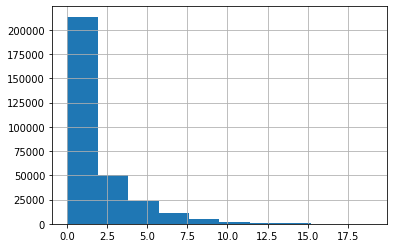

In [504]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = app_train['OBS_60_CNT_SOCIAL_CIRCLE'] < 20

loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

app_train.loc[loc_a, loc_b].hist()
mp.show()

In [505]:
#發現

In [506]:

dtype_select = ['float64']
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])
print(len(numeric_columns))
app_train.shape

65


(307511, 122)

In [507]:
#[str(i) for i in app_train.dtypes if i in dtype_select]
#因為數組呈現非字串模式,可先轉成字串進行篩選
x = list(app_train.columns[app_train.dtypes.astype('str').isin(dtype_select)])
print(len(x))

65


In [508]:
app_train.loc[:,(app_train.dtypes == 'float64')].columns.shape

(65,)

In [509]:
#用｜判斷式可將分割數值類型再次合併
Feature_F_I = app_train.loc[:,(app_train.dtypes == 'float64') | (app_train.dtypes == 'int64')].columns
com_dtype_set = [Feature_F_I]
print(com_dtype_set)

[Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)]


In [513]:
#利用 np.array 篩選 除0,1之外的欄位特徵
for i in app_train.columns:
    #print(i)
    if app_train.loc[:,i].unique().all() == np.array([0,1]).all():
        app_train.drop(columns = i,inplace = True)
print(len(list(i)))

19


In [514]:
app_train.dtypes.shape

(29,)

In [515]:
#檢視欄位數值
np.array(dtype_select).shape


(1,)